# Pellets Permutations 

In [1]:
import numpy as np
import pandas as pd
from itertools import permutations

column_header = np.array(['pellet_1','pellet_2','pellet_3','pellet_4'])
initial_value = 0.005
end_value = 0.001
# smeared_porosities = np.linspace(initial_value, end_value, 4)
smeared_porosities = [0.085, 0.0102, 0.0102, 0.097]
parameter_study = list(permutations(smeared_porosities))
parameter_matrix = pd.DataFrame(parameter_study,columns=column_header)
print(parameter_matrix)
parameter_matrix.to_csv(path_or_buf='permutations.csv',index=False)

    pellet_1  pellet_2  pellet_3  pellet_4
0     0.0850    0.0102    0.0102    0.0970
1     0.0850    0.0102    0.0970    0.0102
2     0.0850    0.0102    0.0102    0.0970
3     0.0850    0.0102    0.0970    0.0102
4     0.0850    0.0970    0.0102    0.0102
5     0.0850    0.0970    0.0102    0.0102
6     0.0102    0.0850    0.0102    0.0970
7     0.0102    0.0850    0.0970    0.0102
8     0.0102    0.0102    0.0850    0.0970
9     0.0102    0.0102    0.0970    0.0850
10    0.0102    0.0970    0.0850    0.0102
11    0.0102    0.0970    0.0102    0.0850
12    0.0102    0.0850    0.0102    0.0970
13    0.0102    0.0850    0.0970    0.0102
14    0.0102    0.0102    0.0850    0.0970
15    0.0102    0.0102    0.0970    0.0850
16    0.0102    0.0970    0.0850    0.0102
17    0.0102    0.0970    0.0102    0.0850
18    0.0970    0.0850    0.0102    0.0102
19    0.0970    0.0850    0.0102    0.0102
20    0.0970    0.0102    0.0850    0.0102
21    0.0970    0.0102    0.0102    0.0850
22    0.097

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['pellet_1','pellet_2','pellet_3','pellet_4']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']

# n = range(0,int(df.shape[0]))
# data_columns = df.shape[1]

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()


# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns = t_header)
md_df = md_df.T

print('Modeling Results')
md_df *= 1e-6

md_df


ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

In [ ]:
#Create a function class to determine the grouping of process parameters

class param_grouping:
    def __init__(self,tag,data):
        self.tag = tag
        self.data = data
        self.values = [] # unique values of parameters groups
        self.idx = [] # indices of each grouping
        
        #Calculate values 
        self.values = self.data[self.tag].unique() #unique values for this group
        #Find the group indicies
        if (self.values.shape[-1]) == 1:
            self.idx = list(self.data.index)
        else:
            for i in range(self.values.shape[-1]):
                group = self.data.groupby(self.tag).get_group(self.values[i])
                self.idx.append(list(group.index))

pel_1 = param_grouping('pellet_1',parameters_study)
pel_2 = param_grouping('pellet_2',parameters_study)
pel_3 = param_grouping('pellet_3',parameters_study)
pel_4 = param_grouping('pellet_4',parameters_study)

print('Possible values of pellet 1 can assume = ', pel_1.values)
print('The indices of pellet values = ', pel_1.idx)

# index values
# 0 = 4.59381e-10
# 1 = 3.77934e-10
# 2 = 3.07829e-10
# 3 = 2.47962e-10


Possible values of pellet 1 can assume =  [0.005   0.00875 0.01125 0.02   ]
The indices of pellet values =  [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23]]


    pellet_1  pellet_2  pellet_3  pellet_4
0   0.005000  0.003667  0.002333  0.001000
1   0.005000  0.003667  0.001000  0.002333
2   0.005000  0.002333  0.003667  0.001000
3   0.005000  0.002333  0.001000  0.003667
4   0.005000  0.001000  0.003667  0.002333
5   0.005000  0.001000  0.002333  0.003667
6   0.003667  0.005000  0.002333  0.001000
7   0.003667  0.005000  0.001000  0.002333
8   0.003667  0.002333  0.005000  0.001000
9   0.003667  0.002333  0.001000  0.005000
10  0.003667  0.001000  0.005000  0.002333
11  0.003667  0.001000  0.002333  0.005000
12  0.002333  0.005000  0.003667  0.001000
13  0.002333  0.005000  0.001000  0.003667
14  0.002333  0.003667  0.005000  0.001000
15  0.002333  0.003667  0.001000  0.005000
16  0.002333  0.001000  0.005000  0.003667
17  0.002333  0.001000  0.003667  0.005000
18  0.001000  0.005000  0.003667  0.002333
19  0.001000  0.005000  0.002333  0.003667
20  0.001000  0.003667  0.005000  0.002333
21  0.001000  0.003667  0.002333  0.005000
22  0.00100

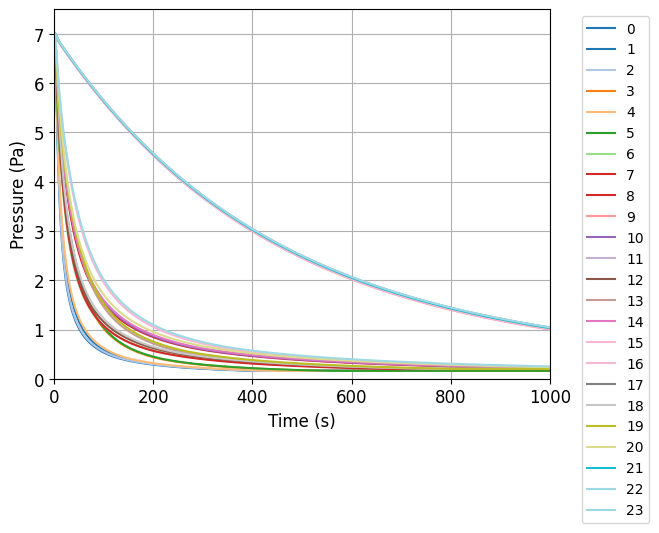

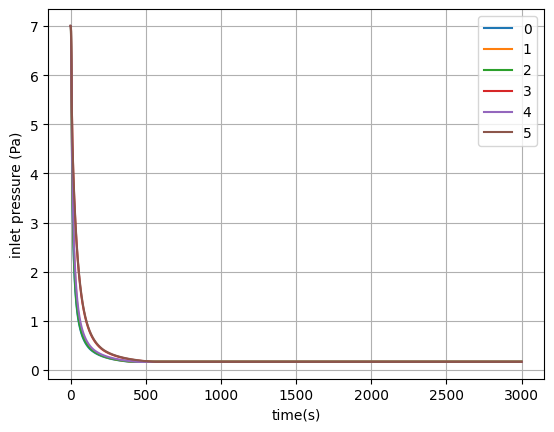

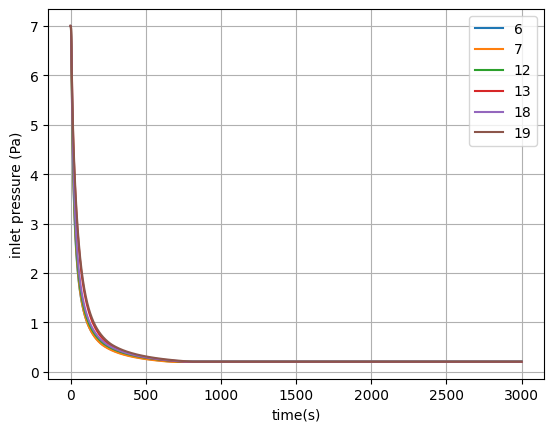

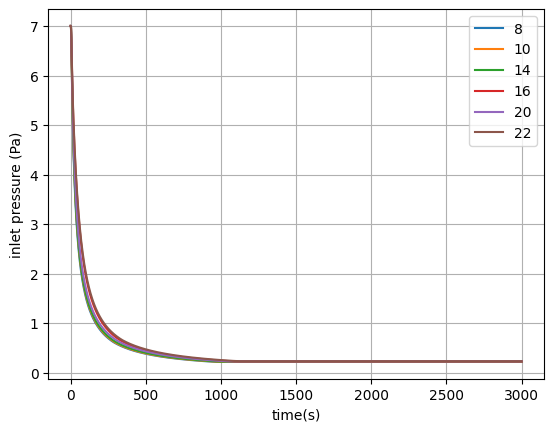

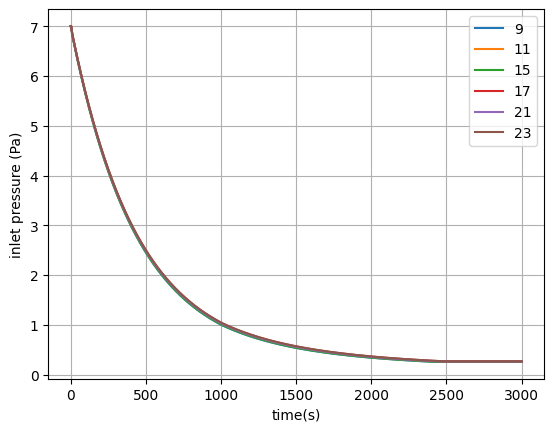

In [ ]:

ax = md_df.plot(colormap='tab20', legend=False)
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0, 1000)
plt.ylim(0, 7.5)

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

md_df.loc[:,pel_1.idx[0]].plot() 
plt.xlabel('time(s)')
plt.ylabel('inlet pressure (Pa)')
plt.grid()
md_df.loc[:,pel_2.idx[3]].plot()
plt.xlabel('time(s)')
plt.ylabel('inlet pressure (Pa)')
plt.grid()
md_df.loc[:,pel_3.idx[3]].plot()
plt.xlabel('time(s)')
plt.ylabel('inlet pressure (Pa)')
plt.grid()
md_df.loc[:,pel_4.idx[3]].plot()
plt.xlabel('time(s)')
plt.ylabel('inlet pressure (Pa)')
plt.grid()

print(parameter_matrix)


In [ ]:
data_100_80 = pd.read_csv('model_pellets_80_CSV_pressure_disribution_0100.csv')
data_200_80 = pd.read_csv('model_pellets_80_CSV_pressure_disribution_0200.csv')
data_300_80 = pd.read_csv('model_pellets_80_CSV_pressure_disribution_0300.csv')

data_100_85 = pd.read_csv('model_pellets_85_CSV_pressure_disribution_0100.csv')
data_200_85 = pd.read_csv('model_pellets_85_CSV_pressure_disribution_0200.csv')
data_300_85 = pd.read_csv('model_pellets_85_CSV_pressure_disribution_0300.csv')

data_100_90 = pd.read_csv('model_pellets_90_CSV_pressure_disribution_0100.csv')
data_200_90 = pd.read_csv('model_pellets_90_CSV_pressure_disribution_0200.csv')
data_300_90 = pd.read_csv('model_pellets_90_CSV_pressure_disribution_0300.csv')

data_100_95 = pd.read_csv('model_pellets_95_CSV_pressure_disribution_0100.csv')
data_200_95 = pd.read_csv('model_pellets_95_CSV_pressure_disribution_0200.csv')
data_300_95 = pd.read_csv('model_pellets_95_CSV_pressure_disribution_0300.csv')

fig = plt.figure(figsize=(6, 14))

ax1 = fig.add_subplot(311)
ax1.plot(data_100_80['y'], data_100_80['pressure']/1e6, color = 'C1', linestyle = '--', label = '0.008')
ax1.plot(data_100_85['y'], data_100_85['pressure']/1e6, color = 'C1', linestyle = '-.', label = '0.0085')
ax1.plot(data_100_95['y'], data_100_95['pressure']/1e6, color = 'C1', linestyle = ':', label = '0.009')
ax1.plot(data_100_90['y'], data_100_90['pressure']/1e6, color = 'C1', linestyle = '-', label = '0.0095')
ax1.set_ylabel('Pressure (MPa)', fontsize = 12)
ax1.grid()
ax1.set_xlabel('y (m)', fontsize = 12)
ax1.set_ylim(0, 3.5)
ax1.set_xlim(0, 0.032)
ax1.set_title('t = 100 s', fontsize = 12)
ax1.legend(title = 'Last Pellet Porosity')

ax2 = fig.add_subplot(312)
ax2.plot(data_200_80['y'], data_200_80['pressure']/1e6, color = 'C2', linestyle = '--', label = '0.008')
ax2.plot(data_200_85['y'], data_200_85['pressure']/1e6, color = 'C2', linestyle = '-.', label = '0.0085')
ax2.plot(data_200_95['y'], data_200_95['pressure']/1e6, color = 'C2', linestyle = ':', label = '0.009')
ax2.plot(data_200_90['y'], data_200_90['pressure']/1e6, color = 'C2', linestyle = '-', label = '0.0095')
ax2.set_xlabel('y (m)', fontsize = 12)
ax2.set_ylabel('Pressure (MPa)', fontsize = 12)
ax2.grid()
ax2.set_ylim(0, 3.5)
ax2.set_xlim(0, 0.032)
ax2.set_title('t = 200 s', fontsize = 12)
ax2.legend(title = 'Last Pellet Porosity')

ax3 = fig.add_subplot(313)
ax3.plot(data_300_80['y'], data_300_80['pressure']/1e6, color = 'C3', linestyle = '--', label = '0.008')
ax3.plot(data_300_85['y'], data_300_85['pressure']/1e6, color = 'C3', linestyle = '-.', label = '0.0085')
ax3.plot(data_300_95['y'], data_300_95['pressure']/1e6, color = 'C3', linestyle = ':', label = '0.009')
ax3.plot(data_300_90['y'], data_300_90['pressure']/1e6, color = 'C3', linestyle = '-', label = '0.0095')
ax3.grid()
ax3.set_ylabel('Pressure (MPa)', fontsize = 12)
ax3.set_xlabel('y (m)', fontsize = 12)
ax3.set_ylim(0, 3.5)
ax3.set_xlim(0, 0.032)
ax3.set_title('t = 300 s', fontsize = 12)
ax3.legend(title = 'Last Pellet Porosity')

plt.tight_layout()




# plt.legend(title = 'Time-Step')



FileNotFoundError: [Errno 2] No such file or directory: 'model_pellets_80_CSV_pressure_disribution_0100.csv'

# Melt Temperature Errors

In [ ]:
#Find the best parameter error
#choose the parameters you want to group and sort by and find the unique values
P =  parameters_study["Power (W)"].unique()
pfr = parameters_study["Powder Feed Rate (g/min)"].unique()
eta_p = parameters_study["Powder Efficiency"].unique()
r_l = parameters_study['Laser Radius (mm)'].unique()
alpha = parameters_study["Absorptivity"].unique()
ps_coeff = parameters_study["Powder Stream Coeff"].unique()

#Grouping for powder efficiency
eta_p_g = []
for i in range(eta_p.shape[-1]):
    group = parameters_study.groupby('Powder Efficiency').get_group(eta_p[i])
    group_i = group.index
    eta_p_g.append(list(group.index))
#     eta_p_g[i,0:group_length] = group_i
#     print(group_i)
#     #     print(g_i)
#     eta_p_g[i,:] = group_i

param = 'eta'
group_name = 'eta_g'

class parameter_grouping:
    def __init__(self,param_tag,param_name,group_nmme):
        self.param_tag = param_tag
        self.param_name = param_name
        self.group_name  = group_name
        
    def get_group(self):
        self.param_name = parameters_study[self.param_tag].unique()
        print(self.param_name)
        return self.param_name

g = parameter_grouping('Powder Efficiency','eta','eta_g')
x = g.get_group()

print(x)
# x.param_tag
#         for i in range(self.param_name)
        
    
#     def parameter_grouping(param_tag,param_name,group_name):
#         param_name = parameters_study['param_tag'].unique()
#         group_name = []
#         for i in range(param_name.shape[-1]):
#             group = parameters_study.groupby(param_tag).get_group(param_name[i])
#             group_name.append(list(ground.index))

        
# print(group.shape[-1])
# # print(eta_p_g)    
# #     

# g = parameters_study.groupby('Powder Efficiency').get_group(eta_p[0])
# g_i = g.index

# parameters_study.loc[g_i] #call the indices of what you are looking at 
# error_df.loc[g_i]


KeyError: 'Power (W)'

In [ ]:
#Create a function class to determine the grouping of process parametjers

class param_grouping:
    def __init__(self,tag,data):
        self.tag = tag
        self.data = data
        self.values = [] # unique values of parameters groups
        self.idx = [] # indicies of each grouping
        
        #Calculate values 
        self.values = self.data[self.tag].unique() #unique values for this group
        print(self.values.shape[-1])
        #Find the group indicies
        if self.values.shape[-1] > 1:
            for i in range(self.values.shape[-1]):
                group = self.data.groupby(self.tag).get_group(self.values[i])
                g_i.append(list(group.index))
                self.idx.append(list(group.index))
        else:
            self.idx = list(self.data.index)



P =  param_grouping('Power (W)',parameters_study)
pfr = param_grouping('Powder Feed Rate (g/min)',parameters_study)
eta_p = param_grouping('Powder Efficiency',parameters_study)
r_l = param_grouping('Laser Radius (mm)',parameters_study)
alpha = param_grouping('Absorptivity',parameters_study)
ps_coeff = param_grouping('Powder Stream Coeff',parameters_study)

eta_p.idx
# print(eta_p.unique_values())
# eta_p.group_indices()
# eta_p_g = eta_p.g_idx[0]

# eta_p_g


# param_grouping('Powder Efficiency',parameters_study).indices()
# eta_p_g = param_grouping('Powder Efficiency',parameters_study).indices()
# print(eta_p_g)

#Grouping for powder efficiency
# eta_p_g = []
# for i in range(eta_p.shape[-1]):
#     group = parameters_study.groupby('Powder Efficiency').get_group(eta_p[i])
#     group_i = group.index
#     eta_p_g.append(list(group.index))


# class parameter_grouping:
#     global 
#     #     def __init__(self,param_tag,param_name,group_nmme):
# #         self.param_tag = param_tag
# #         self.param_name = param_name
# #         self.group_name  = group_name
        
#     def get_group(self):
#         self.param_name = parameters_study[self.param_tag].unique()
#         print(self.param_name)
#         return self.param_name

# g = parameter_grouping('Powder Efficiency','eta','eta_g')
# x = g.get_group()

KeyError: 'Power (W)'